# Odalys Benitez 

In [40]:
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [41]:
def make_system(beta, gamma, mu, alpha, sigma, delta, pi, tau, rho, dt, t0, t_end):
    """
    R= uninfected CD4 lymphocytes
    L=latently infected cells
    E= actively infected cells
    V= free virions
    α	Alpha
    β	Beta
    γ	Gamma
    δ	Delta
    μ	Mu
    π	Pi
    σ,ς *	Sigma
    ρ	Rho
    τ	Tau
    
    returns: System object
    """

    init = State(R=1000, L=0, E=0, V=200)

    t0 = 0
    t_end = 120
    
    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, alpha=alpha, mu=mu, pi=pi, sigma=sigma, delta=delta, tau=tau, rho=rho, dt=dt)

In [42]:
def update_func(init, system, t):
    """Update the SIR model.
    
    state: State (r, l, e v)
    t: time
    system: System object
    
    returns: State (sir)
    """
    unpack(system)
    r, l, e, v = init
    
    
    #rdelta = (gamma * tau) - (mu * r) - (beta * r * v) 
    #ldelta(rho * rdelta_flow_out_L) - (mu * l) - (alpha * l)
    #edelta = ((1 - rho) * (beta * r * v)) + (alpha * l) - (delta * e)
    #vdelta = (pi * e) - (sigma * v)
    rdelta_flow_in = (gamma * tau)
    rdelta_flow_death = (mu * r)
    rdelta_flow_out_L = (beta * r * v) 
    ldelta_flow_in = (rho * rdelta_flow_out_L) 
    ldelta_flow_death = (mu * l) 
    ldelta_flow_out_E = (alpha * l)
    edelta_flow_in = ((1 - rho) * (rdelta_flow_out_L)) + (ldelta_flow_out_E) 
    edelta_flow_death = (delta * e)
    vdelta_creation = (pi * e) 
    vdelta_death = (sigma * v)
    
    r += (rdelta_flow_in - rdelta_flow_death - rdelta_flow_out_L) * dt
    l += (ldelta_flow_in - ldelta_flow_death - ldelta_flow_out_E) * dt
    e += (edelta_flow_in - edelta_flow_death) * dt
    v += (vdelta_creation - vdelta_death) * dt
    
    return State(R=r, L=l, E=e, V=v)

In [43]:
def run_sim(update_func, system):
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    for t in linrange(system.t0, system.t_end, system.dt):
        frame.row[t+system.dt] = update_func(frame.row[t], system, t)
    return frame

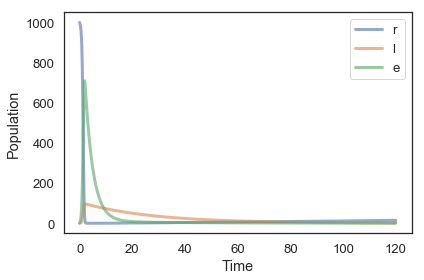

In [54]:
system = make_system(0.00027, 1.36, .00136, .036, 2, 0.33, 100, 0.2, 0.1, 0.01, 0, 120)
result = run_sim(update_func, system)
plot(result.R, '-', label='r')
plot(result.L, '-', label='l')
plot(result.E, '-', label='e')
#plot(result.V, '-', label='v')
decorate(xlabel='Time',
         ylabel='Population')


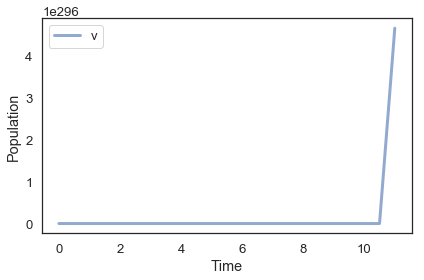

In [49]:
plot(result.V, '-', label='v')
decorate(xlabel='Time',
         ylabel='Population')